<a href="https://colab.research.google.com/github/josecfreittas/ml-na-pratica/blob/master/semana01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Liberdade Econômica, Desenvolvimento Humano, Acesso à internet, Sanitização Básica

Serão utilizados aqui 4 datasets, são eles: [Dados de liberdade econômica pela The Heritage Foundation e The Wall Street Journal](https://www.heritage.org/index/download), [dados de desenvolvimento humano pela United Nations Development Programme](http://hdr.undp.org/en/data), [dados de acesso à internet pela International Telecommunication Union](https://www.kaggle.com/tanuprabhu/list-of-countries-by-number-of-internet-users/notebooks) e [dados de sanitização básica pela World Health Organization](https://washdata.org/data/downloads#WLD).

Todos os dados utilizados serão de 2018/2017.

Não vejo muita aplicação para aprendizado de máquina, mas devem servir para a finalidade da atividade: quisição, organização e análise preliminar de dados.


In [ ]:
# import de bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# leitura, armazenamento e limpeza do dataframe dos indices econômicos

economic = pd.read_csv('https://raw.githubusercontent.com/josecfreittas/ml-na-pratica/master/semana01_dataset/index_of_economic_freedom_2018.csv', encoding='latin-1')

# O dataset possui muitas colunas que não vou utilizar, então, em vez de deletar explicitamente cada uma, vou selecionar as que quero
economic = economic[['Country', '2018 Score']]

# renomeio a segunda coluna para seguir um padrão que utilizarei daqui pra frente
economic.columns = ['Country', 'IEF Score']

# converto para valores numéricos e transformo os números que iriam de 0 à 100 para irem de 0.0 à 1.0, seguindo o mesmo padrão para os dados que virão depois
economic['IEF Score'] = pd.to_numeric(economic['IEF Score'], errors='coerce') / 100

# limpeza de linhas que possuam algum dado vazio (na coluna de score, no caso). optei por não preencher tirando alguma média pois acho que essa abordagem não se encaixa nesses tipos de dados
economic = economic.dropna()


In [4]:
# leitura, armazenamento e limpeza do dataframe dos indices de desenvolvimento

human_development = pd.read_csv('https://raw.githubusercontent.com/josecfreittas/ml-na-pratica/master/semana01_dataset/human_development_index_1990-2018.csv', encoding='latin-1')

# fiz a renomeação desses valores, que são nomes de países, para condizer como eles estavam nomeados no dataset anterior, e poder fazer um merge mais assertiva
human_development = human_development.replace(['Venezuela (Bolivarian Republic of)', 'Tanzania (United Republic of)', 'Syrian Arab Republic'], ['Venezuela', 'Tanzania', 'Syria'])

# metodologia de limpeza parecida com a anterior
human_development = human_development[['Country', '2018']]
human_development.columns = ['Country', 'HDI Score']
human_development['HDI Score'] = pd.to_numeric(human_development['HDI Score'], errors='coerce')
human_development = human_development.dropna()

In [5]:
# leitura, armazenamento e limpeza do dataframe dos dados de sanitização básica
# metodologia de limpeza parecida com a anterior

sanitation = pd.read_csv('https://raw.githubusercontent.com/josecfreittas/ml-na-pratica/master/semana01_dataset/basic_sanitation_2017.csv', encoding='latin-1')

# como nesse caso, como eu mesmo montei o arquivo do dataset, copiei somente as colunas que me interessavas, por isso não tive esse trabalho de reorganização delas aqui no código

sanitation['Basic Sanitation'] =  pd.to_numeric(sanitation['Basic Sanitation'].str.replace('>',''), errors='coerce') / 100
sanitation = sanitation.dropna()


In [6]:
# leitura, armazenamento e limpeza do dataframe dos dados de uso de internet pelo mundo

internet_usage = pd.read_csv('https://raw.githubusercontent.com/josecfreittas/ml-na-pratica/master/semana01_dataset/world_internet_usage_2018.csv', encoding='latin-1')
internet_usage = internet_usage[['Country or Area', 'Percentage']]
internet_usage.columns = ['Country', 'Internet Access']
internet_usage['Internet Access'] = pd.to_numeric(internet_usage['Internet Access'].str.rstrip('%'), errors='coerce') / 100
internet_usage = internet_usage.dropna()


In [7]:
# aqui é feito o merge dos quatro dataframes em um único

dataframe = pd.merge(economic, human_development)
dataframe = pd.merge(dataframe, internet_usage)
dataframe = pd.merge(dataframe, sanitation)
dataframe.head()

,Country,IEF Score,HDI Score,Internet Access,Basic Sanitation
0,Afghanistan,0.513,0.496,0.1145,0.43
1,Albania,0.645,0.791,0.7185,0.98
2,Algeria,0.447,0.759,0.4769,0.88
3,Angola,0.486,0.574,0.1434,0.50
4,Armenia,0.687,0.760,0.6972,0.94


Agora temos um dataframe unificado de uma lista de países, e todos tem suas pontuações em desenvolvimento humano, liberdade econômica, acesso à internet e sanitização básica.

Tendo esse dataframe, podemos tentar ver correlações entre esses dados

In [ ]:
dataframe.corr()

,IEF Score,HDI Score,Internet Access,Basic Sanitation
IEF Score,1.000000,0.703608,0.694877,0.535786
HDI Score,0.703608,1.000000,0.919840,0.878554
Internet Access,0.694877,0.919840,1.000000,0.831202
Basic Sanitation,0.535786,0.878554,0.831202,1.000000


De fato, existe correlações entre essas colunas. Algumas mais discretas, como entre o IEF (liberdade econômica) e sanatização básica, e outras bem mais diretas, como acesso à internet e HDI (desenvolvimento humano).

Abaixo vou fazer alguns gráficos com as correlações que parecem mais interessantes de serem analizadas.

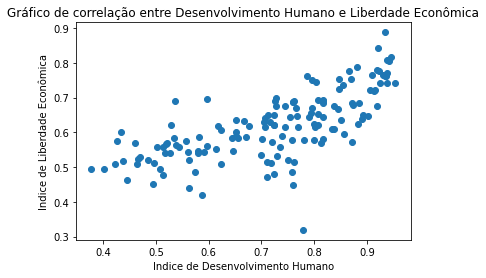

In [8]:
plt.scatter(dataframe['HDI Score'], dataframe['IEF Score'])
plt.xlabel('Indice de Desenvolvimento Humano')
plt.ylabel('Indice de Liberdade Econômica')
plt.title('Gráfico de correlação entre Desenvolvimento Humano e Liberdade Econômica')
plt.show()

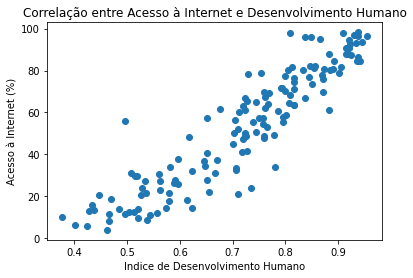

In [10]:
plt.scatter(dataframe['HDI Score'], dataframe['Internet Access'] * 100)
plt.xlabel('Indice de Desenvolvimento Humano')
plt.ylabel('Acesso à Internet (%)')
plt.title('Correlação entre Acesso à Internet e Desenvolvimento Humano')
plt.show()

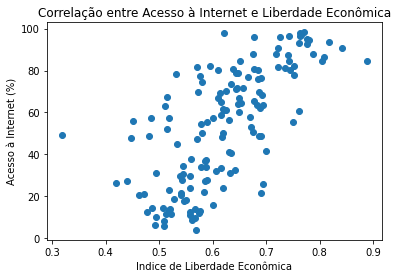

In [11]:
plt.scatter(dataframe['IEF Score'], dataframe['Internet Access'] * 100)
plt.xlabel('Indice de Liberdade Econômica')
plt.ylabel('Acesso à Internet (%)')
plt.title('Correlação entre Acesso à Internet e Liberdade Econômica')
plt.show()

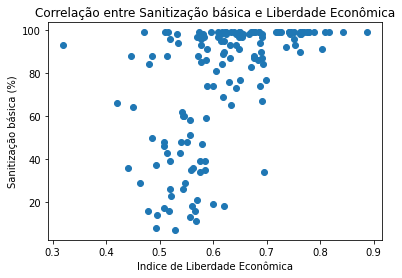

In [12]:
plt.scatter(dataframe['IEF Score'], dataframe['Basic Sanitation'] * 100)
plt.xlabel('Indice de Liberdade Econômica')
plt.ylabel('Sanitização básica (%)')
plt.title('Correlação entre Sanitização básica e Liberdade Econômica')
plt.show()

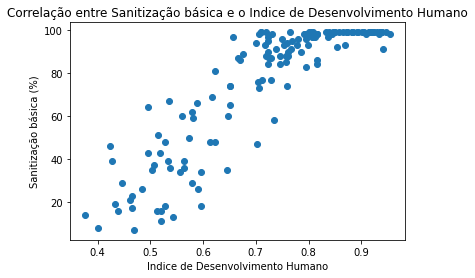

In [13]:
plt.scatter(dataframe['HDI Score'], dataframe['Basic Sanitation'] * 100)
plt.xlabel('Indice de Desenvolvimento Humano')
plt.ylabel('Sanitização básica (%)')
plt.title('Correlação entre Sanitização básica e o Indice de Desenvolvimento Humano')
plt.show()

Agora os países serão separados em grupos, de acordo com seus indices de desenvolvimento humano

In [14]:
# dataframe copiado para não acabar bagunçando com o original
framecopy = dataframe.copy()

# as pontuações mais baixas de idh são em torno de 0.4, farei essa reescala para distribuir tudo entre 0.0 e 1.0 para poder separar mais fácil nos grupos 
basic_sanitation = framecopy['HDI Score']
framecopy['HDI Score'] = (basic_sanitation-basic_sanitation.min())/(basic_sanitation.max()-basic_sanitation.min())

group_01 = framecopy[framecopy['HDI Score'] <= 0.33]
group_02 = framecopy[(framecopy['HDI Score'] > 0.33) & (framecopy['HDI Score'] < 0.66)]
group_03 = framecopy[framecopy['HDI Score'] >= 0.66]

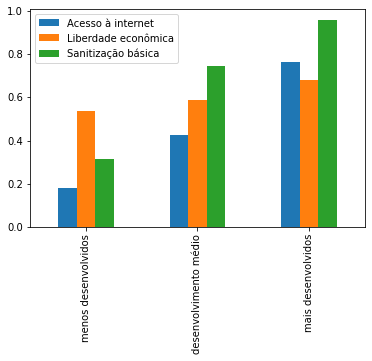

In [15]:

# gráfico de barras comparando a média de acesso à internet, liberdade econômica e sanitização básicas nos 3 grupos

A = [
  group_01['Internet Access'].mean(),
  group_02['Internet Access'].mean(),
  group_03['Internet Access'].mean(),
]

B = [
  group_01['IEF Score'].mean(),
  group_02['IEF Score'].mean(),
  group_03['IEF Score'].mean(),
]

C = [
  group_01['Basic Sanitation'].mean(),
  group_02['Basic Sanitation'].mean(),
  group_03['Basic Sanitation'].mean(),
]


df = pd.DataFrame(np.c_[A,B,C], index=['menos desenvolvidos', 'desenvolvimento médio', 'mais desenvolvidos'], columns=['Acesso à internet', 'Liberdade econômica', 'Sanitização básica'])
df.plot.bar()

plt.show()